In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [354]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [355]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/gadejeevanasandhya/myenv/lib/python3.9/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [356]:
df=pd.read_csv('ground_water_quality_2022_pre.csv')

In [357]:
df.head()

,sno,district,mandal,village,temp_id,long_gis,lat_gis,RL_GIS,season,pH,...,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1,portability
0,1,ADILABAD,Adilabad,Adilabad,1001.0,78.52,19.67,253.0,premonsoon 2022,8.27,...,135.0,9.0,72.0,58.34,420.0,2.86,C3S1,-1.6,P.S.,0.0
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,1002.0,78.35,19.46,435.0,premonsoon 2022,8.3,...,42.0,2.0,32.0,24.31,180.0,1.36,C2S1,0.0,P.S.,1.0
2,3,ADILABAD,Bela,Chandpally,1003.0,78.85,19.68,247.0,premonsoon 2022,8.22,...,89.0,5.0,56.0,43.76,320.0,2.16,C3S1,-1.4,P.S.,0.0
3,4,ADILABAD,Bheempur,Arli,1004.0,78.38,19.83,224.0,premonsoon 2022,8.23,...,96.0,6.0,56.0,43.76,320.0,2.33,C3S1,-2.2,P.S.,0.0
4,5,ADILABAD,Bheempur,Bheempur,1005.0,78.42,19.77,245.0,premonsoon 2022,8.31,...,92.0,6.0,64.0,48.62,360.0,2.11,C3S1,-3.2,P.S.,0.0


In [358]:
df.columns = df.columns.str.strip()

In [359]:
print(df.columns)

Index(['sno', 'district', 'mandal', 'village', 'temp_id', 'long_gis',
       'lat_gis', 'RL_GIS', 'season', 'pH', 'E.C', 'TDS', 'HCO3', 'Cl', 'F',
       'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification',
       'RSC  meq  / L', 'Classification.1', 'portability'],
      dtype='object')


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               1025 non-null   int64  
 1   district          1024 non-null   object 
 2   mandal            1024 non-null   object 
 3   village           1024 non-null   object 
 4   temp_id           1024 non-null   float64
 5   long_gis          1024 non-null   float64
 6   lat_gis           1024 non-null   float64
 7   RL_GIS            860 non-null    float64
 8   season            1024 non-null   object 
 9   pH                967 non-null    object 
 10  E.C               967 non-null    float64
 11  TDS               967 non-null    float64
 12  HCO3              967 non-null    float64
 13  Cl                967 non-null    float64
 14  F                 967 non-null    float64
 15  SO4               967 non-null    float64
 16  Na                967 non-null    float64


In [361]:
df.isnull().sum()

sno                   0
district              1
mandal                1
village               1
temp_id               1
long_gis              1
lat_gis               1
RL_GIS              165
season                1
pH                   58
E.C                  58
TDS                  58
HCO3                 58
Cl                   58
F                    58
SO4                  58
Na                   58
K                    58
Ca                   58
Mg                   58
T.H                  58
SAR                  58
Classification       58
RSC  meq  / L        58
Classification.1     58
portability           1
dtype: int64

<Axes: >

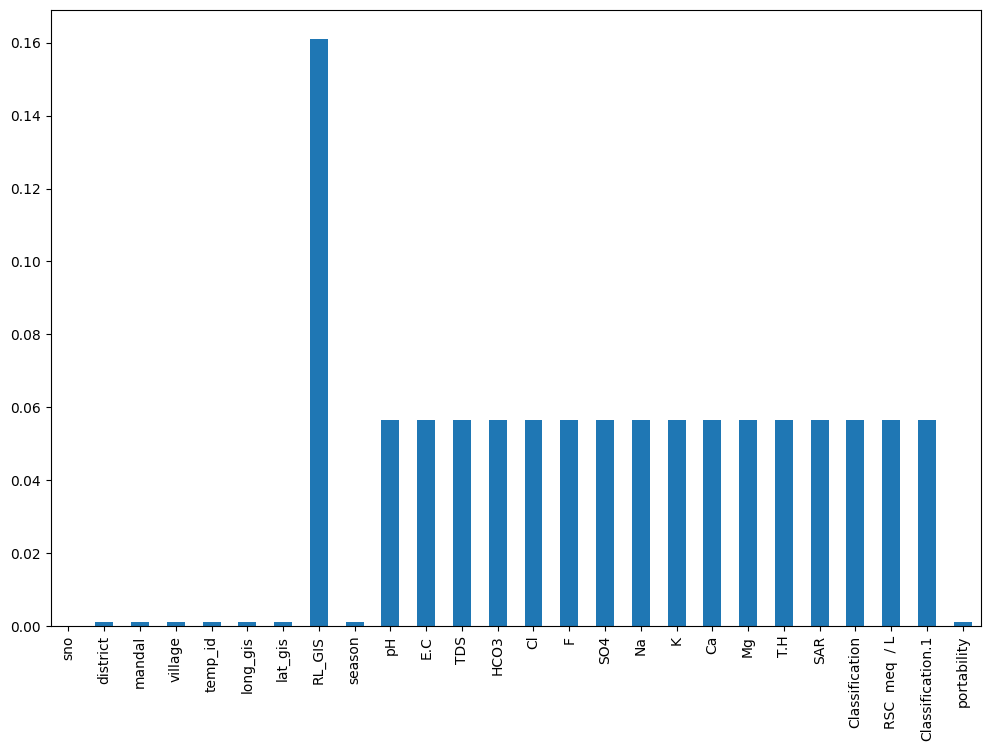

In [362]:
df.isnull().mean().plot.bar(figsize= (12,8))

In [363]:
import numpy as np

df['pH'] = df['pH'].replace('\.\.', np.nan, regex=True)


In [364]:
df['pH'] = df['pH'].astype(float)


In [365]:
df['pH']=df['pH'].fillna(df['pH'].mean())
df['E.C']=df['E.C'].fillna(df['E.C'].mean())
df['TDS']=df['TDS'].fillna(df['TDS'].mean())
df['TDS']=df['TDS'].fillna(df['TDS'].mean())
df['HCO3']=df['HCO3'].fillna(df['HCO3'].mean())
df['Cl']=df['Cl'].fillna(df['Cl'].mean())
df['F']=df['F'].fillna(df['F'].mean())
df['SO4']=df['SO4'].fillna(df['SO4'].mean())
df['Na']=df['Na'].fillna(df['Na'].mean())
df['K']=df['K'].fillna(df['K'].mean())
df['Ca']=df['Ca'].fillna(df['Ca'].mean())
df['Mg']=df['Mg'].fillna(df['Mg'].mean())
df['T.H']=df['T.H'].fillna(df['T.H'].mean())
df['SAR']=df['SAR'].fillna(df['SAR'].mean())
df['lat_gis']=df['lat_gis'].fillna(df['lat_gis'].mean())
df['long_gis']=df['long_gis'].fillna(df['long_gis'].mean())
df['temp_id']=df['temp_id'].fillna(df['temp_id'].mean())
df['portability']=df['portability'].fillna(df['portability'].mean())

In [366]:
df['TDS'].isnull().sum()

0

In [367]:
df.isnull().sum()

sno                   0
district              1
mandal                1
village               1
temp_id               0
long_gis              0
lat_gis               0
RL_GIS              165
season                1
pH                    0
E.C                   0
TDS                   0
HCO3                  0
Cl                    0
F                     0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification       58
RSC  meq  / L        58
Classification.1     58
portability           0
dtype: int64

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               1025 non-null   int64  
 1   district          1024 non-null   object 
 2   mandal            1024 non-null   object 
 3   village           1024 non-null   object 
 4   temp_id           1025 non-null   float64
 5   long_gis          1025 non-null   float64
 6   lat_gis           1025 non-null   float64
 7   RL_GIS            860 non-null    float64
 8   season            1024 non-null   object 
 9   pH                1025 non-null   float64
 10  E.C               1025 non-null   float64
 11  TDS               1025 non-null   float64
 12  HCO3              1025 non-null   float64
 13  Cl                1025 non-null   float64
 14  F                 1025 non-null   float64
 15  SO4               1025 non-null   float64
 16  Na                1025 non-null   float64


In [369]:
df['portability'] = df['portability'].astype(int)

In [370]:
X = df.drop(['sno','district','mandal','village','temp_id','long_gis','lat_gis','RL_GIS','season','E.C','HCO3','Na','K','Ca','Mg','Classification','SAR','RSC  meq  / L','Classification.1','portability'],axis=1)

In [371]:
Y= df['portability']

In [372]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

In [373]:
Y_train.value_counts()

portability
0    618
1    202
Name: count, dtype: int64

In [374]:
Y_test.value_counts()

portability
0    165
1     40
Name: count, dtype: int64

In [375]:
from sklearn.linear_model import LogisticRegression

In [376]:
model_lr=LogisticRegression()
model_lr.fit(X_train,Y_train)

/Users/gadejeevanasandhya/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [377]:
predict_lr=model_lr.predict(X_test)

In [378]:
accuracy_score_lr=accuracy_score(Y_test,predict_lr)
print(accuracy_score_lr)

0.9707317073170731


In [379]:
X_DT=model_lr.predict([[8.17,802,160,0.08,38,360]])
if (X_DT==1):
  print("can be drinkable")
elif X_DT==0 :
  print("can't be drinkable")


can't be drinkable


/Users/gadejeevanasandhya/myenv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [380]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
feature_importances = model.feature_importances_
print(feature_importances)

[0.01911288 0.60791924 0.14471746 0.019226   0.06336678 0.14565764]


In [381]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, Y_test)
print(perm_importance)

{'importances_mean': array([0.        , 0.28780488, 0.        , 0.        , 0.        ,
       0.00097561]), 'importances_std': array([0.        , 0.02653945, 0.        , 0.        , 0.        ,
       0.00195122]), 'importances': array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.28780488, 0.31219512, 0.26341463, 0.25365854, 0.32195122],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00487805]])}


In [382]:
from sklearn.feature_selection import RFE
model_rf= RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, Y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [383]:
pred_rf=rfe.predict(X_test)

In [384]:
from sklearn.metrics import accuracy_score
y_pred = rfe.predict(X_test)
accuracy_score_rf = accuracy_score(Y_test, y_pred)
print(accuracy_score_rf)


0.9853658536585366


In [385]:
X_DT=rfe.predict([[8.17,802,160,0.08,38,360]])
if (X_DT==1):
  print("can be drinkable")
elif X_DT==0 :
  print("can't be drinkable")


can't be drinkable


/Users/gadejeevanasandhya/myenv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [386]:
import pickle
with open('abc.pkl','wb') as file:
  pickle.dump(dt,file)